## Name: Franklin Limaico


# Homework 1: Interstellar Medium

The homework should be submitted as a python notebook. 

Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the 5th of October.</b>

Total points: 20

Please let me know if you have any questions. 

<b>Important notes: </b> 
- The tutorial notebooks contain the methods that you can use to solve the homework. 
- If you have problems with some of the specific astrophysics packages, make sure to check the versions. Not all versions of the packages are compatible with each other. In particular astroquery has problems with some versions of astropy. This is a combination of the two packages that should work together:
    - astroquery==0.4.6
    - astropy==5.1.1
- Also check the package requirements for GaussPy+ 


## 1. (12 points) Analysis of interstellar gas components using Gaussian decomposition

This problem analyses the properties of a neutral hydrogen (HI) cloud in the Small Magellanic Cloud (SMC). The data was taken with the ASKAP telescope and is a subset of the data presented in Pingel et al. 2022 (https://doi.org/10.1017/pasa.2021.59).

1. Read in the data from the "cloud_sub_cube.fits" file (In the Homework/data directory). What are the dimensions of the data cube?
2. Make a declination vs. velocity plot. How many distinct features can you see in the plot? 
3. Make a spectrum of the whole cube (velocity vs intensity summed for all spatial pixels). Can you identify the same features (lines) as in the declination vs. velocity plot? Do you see any differences? 
4. Make a moment 0 map (inegrated intensity map) of the following velocity range: 96 - 113 km/s. 
- For this, make an array of the relevant velocity range by calculating the values for the velocity axis in km/s. 
- Use numpy.where() to find the indecies for the relevant velocity range, 
- then use indecies to select the relevant part of the data cube. 
- Once you have the sub-array, calculate the integrated intensity for each pixel and make a plot. 

What kind of structure do you see?

5. Decompose the full data cube with GaussPy+ (https://github.com/mriener/gausspyplus). 
- For the decomposition you can use the following $\alpha _1 = 1.59$ and $\alpha _2 = 5.9$ parameters. 
- You should update the "step_4-decompose--grs.py" file with these number. 
- <b> Note: I do not recommend to run the sections: "1. Create a training set from the data" and "2. Find the optimal values for the smoothing parameters $\alpha_1$ and $\alpha_2$". These are computationally intensive and can take a long time. </b>

6. Based on the $\chi^2$ map, did the decomposition perform well? How many components did Gausspy find on average?
7. Make histograms of the decomposition results for $v_{LSR}$ , FWHM (full width at half max), and amplitude. What can you conclude about the structure of the interstellar gas based on the histograms?
8. Make a scatter plot of $v_{LSR}$ vs. FWHM. How many distinct features do you see? 
9. Make a map of the Gaussian components with $ 96 < v_{LSR} < 113$ km/s.
10. Make a plot of the spectrum with the Gaussian components for the following pixels: x: 110, y:100; x:55, y:50; x:160, y:160. Does the spectra show the same features at these 3 different positions?


**1.1**  Read in the data from the "cloud_sub_cube.fits" file (In the Homework/data directory). What are the dimensions of the data cube?


**Source: View_ISM_data_v1.ipynb**

In [2]:
# viewing the content of the fits data cube

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS


# for the animation
import glob
from PIL import Image
import os
from IPython import display

# import necessary libraries and plotting functions

import os

%matplotlib inline
import matplotlib
from pylab import cm

from gausspyplus.plotting import get_points_for_colormap, shiftedColorMap

#Import more libraries

import pandas as pd
from astropy.io import ascii

from spectral_cube import SpectralCube
from scipy.stats import lognorm, norm
from reproject import reproject_interp

import matplotlib as mpl



In [3]:
pwd

'/mnt/c/Users/frnkl/Desktop/DECIMO SEMESTRE/Astrophysical_Objects/Notebooks_mine_version/Homework'

In [4]:
!ls

Homework_1_ISM.ipynb  step_3-prepare--grs.py
comparison.png	      step_4-decompose--grs.py
data		      step_5-spatial_refitting-p1--grs.py
decomposition_grs     step_6-spatial_refitting-p2--grs.py
gausspy+.ini	      step_7-finalize--grs.py


In [5]:
# opening the data file

data_dir = "./data/"
file = 'cloud_sub_cube.fits'
hdul = fits.open(data_dir+file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data

In [6]:
# viewing the metadata
#print(h)

# check the shape and dimension of the data

print(d.shape)

(220, 180, 180)


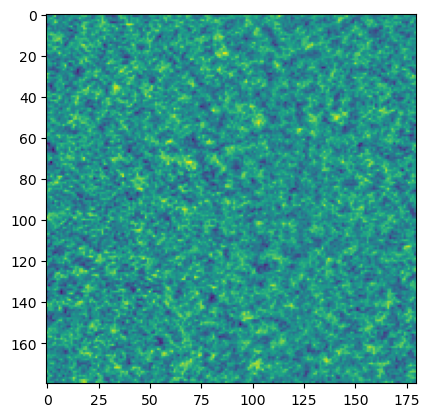

In [10]:
# print slices of the data

plt.imshow(d[219,:,:])

In [11]:
print("The dimension of the data cube is: ",d.ndim)

The dimension of the data cube is:  3


**1.2.**  Make a declination vs. velocity plot. How many distinct features can you see in the plot? 

**Source: View_ISM_data_v1.ipynb**


In [12]:
print(h['CDELT3'])
print(h['CUNIT3'])
print(h['CRPIX1'], h['CRPIX2'], h['CRPIX3'])
print(h['CRVAL3'])

-977.198303423
m/s
504.0 -508.0 1.0
257847.381515


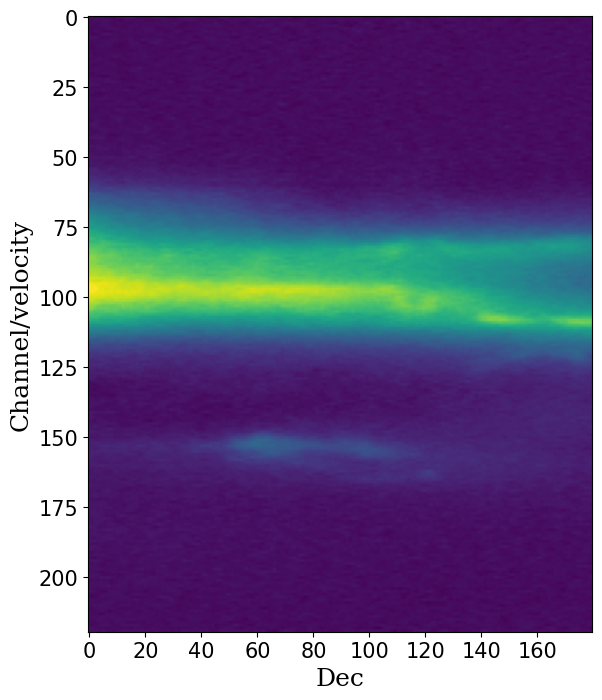

In [14]:
fig = plt.figure(figsize=(11,8))

d_2_av2 = np.mean(d, axis=2) # axis 2 is the RA, axis 1 is the declination (computer reading)
d_2_av3 = np.mean(d, axis=1) # axis 2 is the RA, axis 1 is the declination (computer reading)

ax = fig.add_subplot(1,1,1)
#plt.imshow(d_2_av2[:-2,:])
plt.imshow(d_2_av2)


ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/velocity', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax = fig.add_subplot(1,2,2)
#plt.imshow(d_2_av3[:-2,:])
#plt.imshow(d_2_av3)


#ax.set_xlabel('R.A.', size=18,family='serif')
#ax.set_ylabel('Channel/velocity', size=18,family='serif')
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.show()

**1.3** Make a spectrum of the whole cube (velocity vs intensity summed for all spatial pixels). Can you identify the same features (lines) as in the declination vs. velocity plot? Do you see any differences? 

**Source: ISM.ipynb is the process for the velocity plot of the WHOLE cube**

In [16]:
# check the description of the 3rd axis (velocity or frequency)

print(h['**3'])

NAXIS3  =                  220                                                  CRPIX3  =                  1.0 / Pixel coordinate of reference point            CDELT3  =       -977.198303423 / [m/s] Coordinate increment at reference point  CUNIT3  = 'm/s'                / Units of coordinate increment and value        CTYPE3  = 'VRAD'               / Radio velocity (linear)                        CRVAL3  =        257847.381515 / [m/s] Coordinate value at reference point      END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Velocity (of the whole data cube) has a shape of: (220,)
3rd axis type VRAD
3rd axis steps -977.198303423
3rd axis reference 257847.381515
data units K


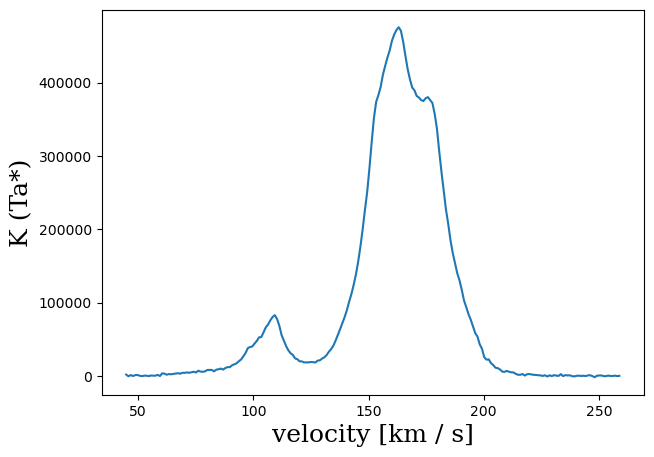

In [18]:
# average for the whole cube, but make sure to take the masked data that does not have the noise anymore
# Note the tipical "dubble horn" shape of the profile, this is showing the rotation of the galaxy

d_av = np.sum(d[:,:,:], axis = 1)
#print(d_av.shape)
d_av_3 = np.sum(d_av[:,:], axis = 1)
spectra = d_av_3[:]
print("Velocity (of the whole data cube) has a shape of:",spectra.shape)

# checking the units of the spectral axis
print('3rd axis type', h['CTYPE3'])  # the third dimension of this cube is in heliocentric velocity
print('3rd axis steps', h['CDELT3']) # in m/s
print('3rd axis reference', h['CRVAL3']) # in m/s
print('data units', h['BUNIT'])

# calculate the value for the first coordinate
s_start = h['CRVAL3'] - h['CRPIX3']*h['CDELT3']

# calculate the velocity axis
x_axis = (np.arange(0,len(spectra))*h['CDELT3']+s_start) / 1000 # we also convert to km/s from m/s
# make figure

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
plt.plot(x_axis, spectra)  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
ax.set_xlabel('velocity [km / s]', size=18,family='serif')
ax.set_ylabel('K (Ta*)', size=18,family='serif')
plt.show()


**1.4** Make a moment 0 map (inegrated intensity map) of the following velocity range: 96 - 113 km/s. 
- For this, make an array of the relevant velocity range by calculating the values for the velocity axis in km/s. 
- Use numpy.where() to find the indecies for the relevant velocity range, 
- then use indecies to select the relevant part of the data cube. 
- Once you have the sub-array, calculate the integrated intensity for each pixel and make a plot. 

**Source: ISM.ipynb**

Integrated intensity map is the one that takes only the declination and right ascencion axis for the whole velocities.

We are allowed to use the velocity axis array of the previous item and then it isolates for the desired velocities


In [19]:
# First, the array of the relevant velocity ranges:
print("The array of the velocities in km/m has the shape:", x_axis.shape)

#Second, get the indices of the relevant velocity range
indices = np.where((x_axis>96) & (x_axis<113))

print(indices)

The array of the velocities in km/m has the shape: (220,)
(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166]),)


# Make moment maps

**source: View_ISM_data.ipynb**

In [20]:
#Third, Use the indices to get the relevant part of the data cube

d_desired = d[150:167,:,:] #the last index + 1

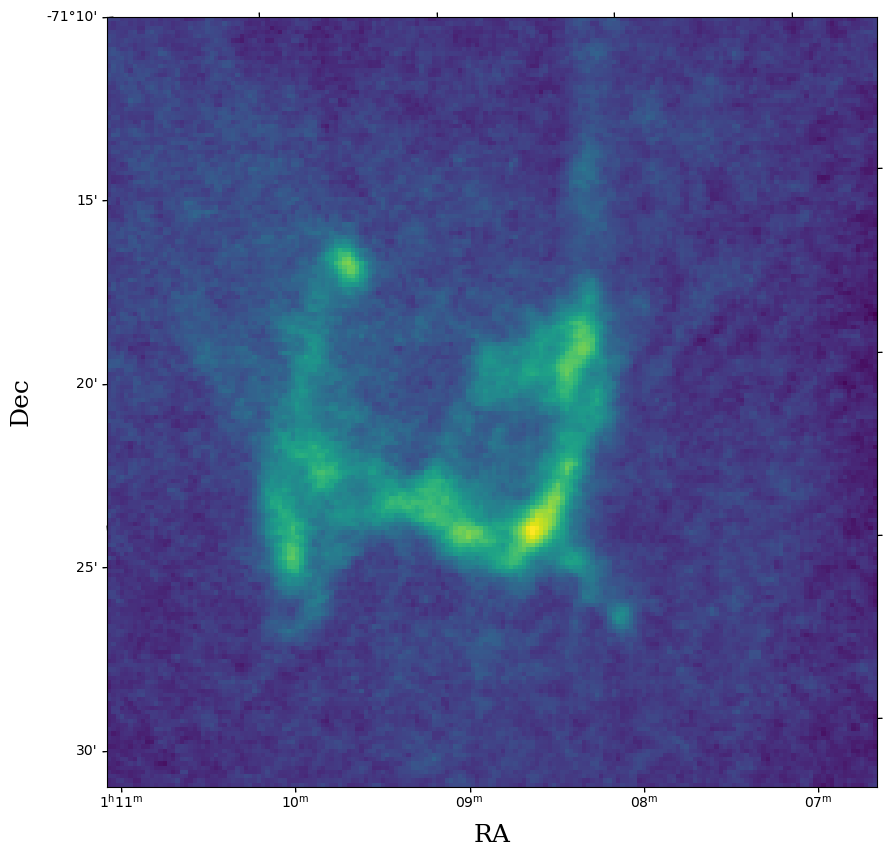

In [21]:
#Fourth, calculate the integrated intensity plot (moment 0 map)

fig = plt.figure(figsize=(11,10))

# moment 0 - integrated intensity per pixel
d_2_av = np.sum(d_desired, axis=0)* abs(h['CDELT3'])/1000

ax = fig.add_subplot(1,1,1, projection=WCS(h), slices=('x', 'y', 50))
plt.imshow(d_2_av)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# What kind of structure do you see?

Answer:

**1.5** Decompose the full data cube with GaussPy+ (https://github.com/mriener/gausspyplus). 
- For the decomposition you can use the following $\alpha _1 = 1.59$ and $\alpha _2 = 5.9$ parameters. 
- You should update the "step_4-decompose--grs.py" file with these number. 
- <b> Note: I do not recommend to run the sections: "1. Create a training set from the data" and "2. Find the optimal values for the smoothing parameters $\alpha_1$ and $\alpha_2$". These are computationally intensive and can take a long time. </b>


In [22]:
def get_cmap_rchi2(vmin, vmax):
    orig_cmap = matplotlib.cm.RdBu_r
    start, stop = get_points_for_colormap(vmin, vmax, central_val=1.)
    midpoint = (1 - vmin) / (vmax - vmin)
    return shiftedColorMap(orig_cmap, start=0., midpoint=midpoint, stop=stop)


def add_style(ax):
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')


if not os.path.exists('decomposition_grs'):
    !mkdir decomposition_grs

<a id="step0"></a>
#### 0. Create a configuration file (optional)

In [19]:
import gausspyplus.config_file as cf
cf.make()

SAVED FILE: 'gausspy+.ini' in '/mnt/c/Users/frnkl/Desktop/DECIMO SEMESTRE/Astrophysical_Objects/Notebooks_mine_version/Homework'


<a id="step3"></a>
#### 3. Prepare the data for the decomposition

Next, we have to prepare our data cube for the decomposition. Execute the script `step_3-prepare--grs.py`

A changing in the file directory is needed.

In [25]:
#  run the script
!python step_3-prepare--grs.py




calculating average rms from data...
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3589.04it/s]
>> calculated rms value of 1.346 from data

GaussPy preparation

preparing GaussPy cube...
Using 9 of 12 cpus
100%|█████████████████████████████████████| 32.4k/32.4k [00:12<00:00, 2.57kit/s]
32397it [00:00, 729650.79it/s]
SUCCESS

32400it [00:00, 208058.44it/s]

pickle dump dictionary...
For GaussPyDecompose: 'path_to_pickle_file' = 'decomposition_grs/gpy_prepared/cloud_sub_cube.pickle'

SAVED FILE: 'cloud_sub_cube_noise_map.fits' in 'decomposition_grs/gpy_maps'

Plotting...
100%|███████████████████████████████████████████| 25/25 [00:02<00:00, 10.51it/s]

SAVED FILE: 'cloud_sub_cube_plots.pdf' in 'decomposition_grs/gpy_plots'


#### Results

Lets take a look at the noise map:

In [21]:
#Get the noise data for plotting

filepath = os.path.join('decomposition_grs', 'gpy_maps', 'cloud_sub_cube_noise_map.fits')
noise = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

#print(noise)

#Get the lower and upper bound for the plot i.e. vmin and vmax

noise_min = np.min(noise)

noise_max = np.percentile(noise, 99.8)

print("The lower and upper bounds are: ", noise_min, " and ", noise_max, "respectively")

The lower and upper bounds are:  0.42520848  and  1.713324768304825 respectively


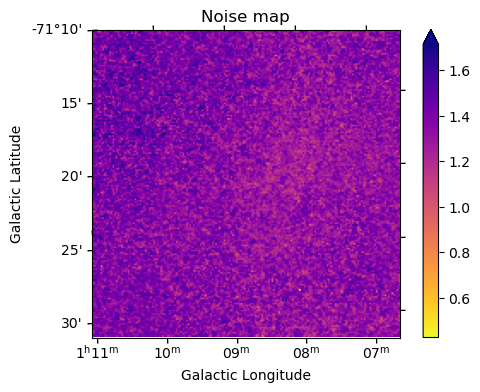

In [22]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(projection=wcs))

#img_noise = ax.imshow(noise, cmap='plasma_r', vmin=0.075, vmax=0.375)
img_noise = ax.imshow(noise, cmap='plasma_r', vmin=noise_min, vmax=noise_max)
fig.colorbar(img_noise, ax=ax, extend='max')
ax.set_title('Noise map')
add_style(ax)

plt.show()

# We have to change to include at least 200 spectra in training set as intructions mention?

<a id="step4"></a>
#### 4. Decomposition of the data

After the successful preparation of the data, we can proceed to the decomposition of the data. 

Change path location and the parameters with $\alpha _1 = 1.59$ and $\alpha _2 = 5.9$ in the script `step_4-decompose--grs`.

Once the script is changed with the requirements, run it!

In [20]:
#  run the script
!python step_4-decompose--grs.py




pickle load 'cloud_sub_cube.pickle'...

GaussPy decomposition

decomposition settings:
GaussPy:
Two phase decomposition: True
alpha1: 1.59
alpha2: 5.9
SNR1: 3.0
SNR2: 3.0

improve_fitting: True
min_fwhm: 1.0
max_fwhm: None
snr: 3.0
snr_fit: 1.5
significance: 5.0
snr_negative: 3.0
rchi2_limit: None
max_amp_factor: 1.1
neg_res_peak: True
broad: True
blended: True
fwhm_factor: 2.0
separation_factor: 0.8493218
exclude_means_outside_channel_range: True
min_pvalue: 0.01
max_ncomps: None

decomposing data...
using 9 out of 12 cpus
100%|██████████████████████████████████████| 32.4k/32.4k [13:51<00:00, 38.9it/s]
32399it [00:00, 710048.73it/s]

pickle dump GaussPy final results...
SAVED FILE: 'cloud_sub_cube_g+_fit_fin.pickle' in 'decomposition_grs/gpy_decomposed'

making component map...
SAVED FILE: 'cloud_sub_cube_g+_component_map.fits' in 'decomposition_grs/gpy_maps'

making reduced chi2 map...
SAVED FILE: 'cloud_sub_cube_g+_rchi2_map.fits' in 'decomposition_grs/gpy_maps'

Plotting...
100%

#### Results
After this script was successfully executed, the `decomposition_grs` directory should contain a folder named `gpy_decomposed` that contains `cloud_sub_cube_g+_fit_fin.pickle`, which is a pickled dictionary of the decomposition results.

In addition, we also produced a map showing the number of fitted components and a map showing the $\chi_{\mathrm{red}}^{2}$ values of the fit. 

Lets take a look at both of these maps:

In [31]:
filepath = os.path.join('decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))
#print(rchi2.flatten())

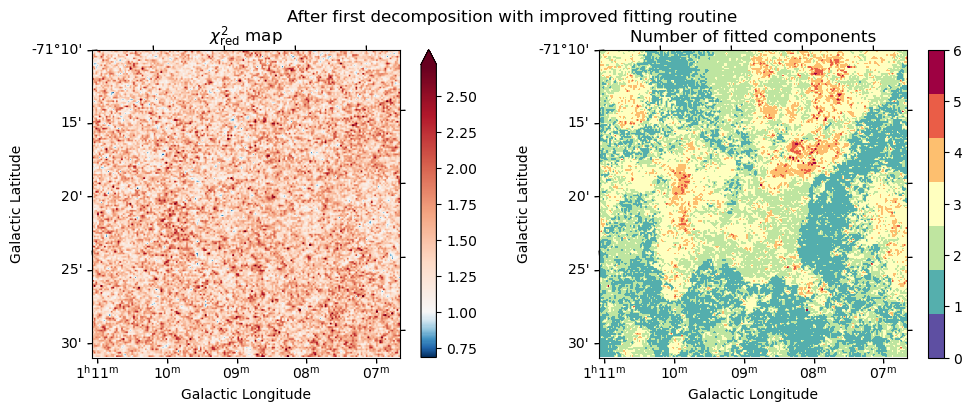

In [33]:

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
vmax = np.percentile(rchi2.flatten(), 99.8)
#vmax = 2.5
new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap, vmin=vmin, vmax=vmax)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_component_map.fits'))

vmax = 6
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap, vmin=0, vmax=vmax)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After first decomposition with improved fitting routine')

plt.show()

<a id="step5"></a>
#### 5. Spatially coherent refitting - phase 1

Next we will try to improve upon the decomposition results obtained in the last step.

For this we execute the `step_5-spatial_refitting-p1--grs.py` script

In [25]:
#  run the script
!python step_5-spatial_refitting-p1--grs.py


Spatial refitting - Phase 1

Flagging:
 - Blended components: True
 - Negative residual features: True
 - Broad components: True
   flagged if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: True
 - Differing number of components: True

For phase 1:
Exclude flagged spectra as possible refit solutions in first refit attempts: False
Use also flagged spectra as refit solutions in case no new best fit could be obtained from unflagged spectra: False

Refitting:
 - Blended components: True
 - Negative residual features: True
 - Broad components: True
   try to refit if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: Fal


start refit iteration #10...
Using 9 of 12 cpus
100%|█████████████████████████████████████| 9.35k/9.35k [00:04<00:00, 2.09kit/s]
9351it [00:00, 747977.28it/s]
SUCCESS

Results of the refit iteration:
Tried to refit 17 spectra
Successfully refitted 10 spectra (58.82%)

***

determine spectra that need refitting...

9348 out of 32400 spectra (28.85%) selected for refitting:
 - 3928 spectra w/ blended components (3928 flagged)
 - 176 spectra w/ negative residual feature (176 flagged)
 - 7176 spectra w/ broad feature (7176 flagged)
   (info: 188 spectra w/ a FWHM > 73 channels)
 - 0 spectra w/ high rchi2 value (0 flagged)
 - 0 spectra w/ residual not passing normality test (3926 flagged)
 - 181 spectra w/ differing number of components (181 flagged)

start refit iteration #11...
Using 9 of 12 cpus
100%|█████████████████████████████████████| 9.35k/9.35k [00:04<00:00, 2.11kit/s]
9345it [00:00, 756353.88it/s]
SUCCESS

Results of the refit iteration:
Tried to refit 12 spectra
Successfully ref

#### Results

Lets take a look again at both of these maps:

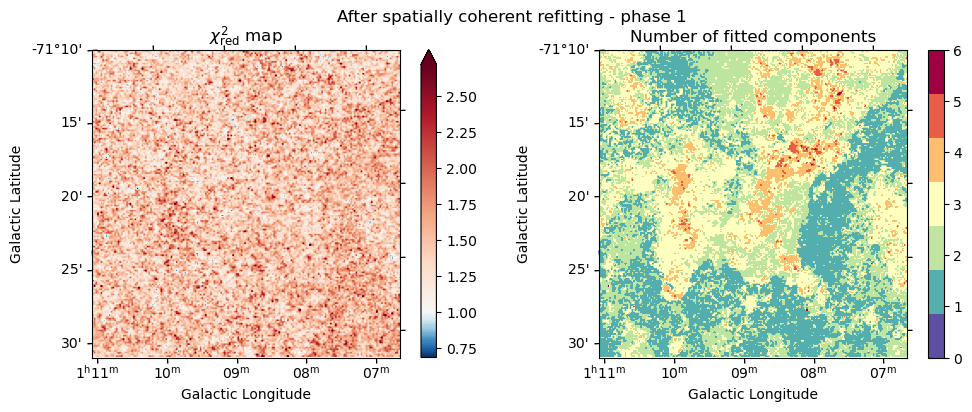

In [34]:
filepath = os.path.join(
    'decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_fit_fin_sf-p1_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
header = fits.getheader(filepath)
wcs = WCS(header)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
vmax = np.percentile(rchi2.flatten(), 99.8)
#vmax = 2.5
new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap, vmin=vmin, vmax=vmax)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_fit_fin_sf-p1_component_map.fits'))

vmax = 6
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap, vmin=0, vmax=vmax)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After spatially coherent refitting - phase 1')

plt.show()

<a id="step6"></a>
#### 6. Spatially coherent refitting - phase 2

In the last step, we try to further improve upon the decomposition results obtained in the last step by checking the coherence of the centroid positions of the fitted Gaussian components. 

In [27]:
#  run the script
!python step_6-spatial_refitting-p2--grs.py


Spatial refitting - Phase 2

Flagging:
 - Blended components: True
 - Negative residual features: True
 - Broad components: True
   flagged if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: True
 - Differing number of components: True

threshold for required components: 0.833

 Flags:
 - 3923 spectra w/ blended components
 - 176 spectra w/ negative residual feature
 - 7169 spectra w/ broad feature
   (info: 188 spectra w/ a FWHM > 73 channels)
 - 0 spectra w/ high rchi2 value
 - 3925 spectra w/ residual not passing normality test
 - 181 spectra w/ differing number of components

check which spectra require refitting...

determine neighbors for all spectra...
32400it [00:21, 1532.69it/s]

start refit iteration #1...
Using 9 of 12 cpus
100%|██████████████████████████████████████| 32.4k/32.4k [25:00<0


start refit iteration #12...
Using 9 of 12 cpus
100%|██████████████████████████████████████| 9.23k/9.23k [01:35<00:00, 96.2it/s]
9229it [00:00, 794491.84it/s]
SUCCESS

Results of the refit iteration:
Tried to refit 704 spectra
Successfully refitted 286 spectra (40.62%)

***

threshold for required components: 0.667

 Flags:
 - 4884 spectra w/ blended components
 - 170 spectra w/ negative residual feature
 - 8176 spectra w/ broad feature
   (info: 240 spectra w/ a FWHM > 73 channels)
 - 0 spectra w/ high rchi2 value
 - 3687 spectra w/ residual not passing normality test
 - 220 spectra w/ differing number of components

check which spectra require refitting...

start refit iteration #13...
Using 9 of 12 cpus
100%|██████████████████████████████████████| 3.56k/3.56k [00:39<00:00, 89.7it/s]
3555it [00:00, 637947.66it/s]
SUCCESS

Results of the refit iteration:
Tried to refit 344 spectra
Successfully refitted 148 spectra (43.02%)

***

threshold for required components: 0.667

 Flags:
 - 48

#### Results
After this script was successfully executed, the `gpy_decomposed` folder contains the new file `cloud_sub_cube_g+_fit_fin_sf-p2.pickle`, which is a pickled dictionary of the new decomposition results.

In addition, we also produced new corresponding maps of the number of fitted components and $\chi_{\mathrm{red}}^{2}$ values of the fit. 

Lets take a look again at both of these maps:

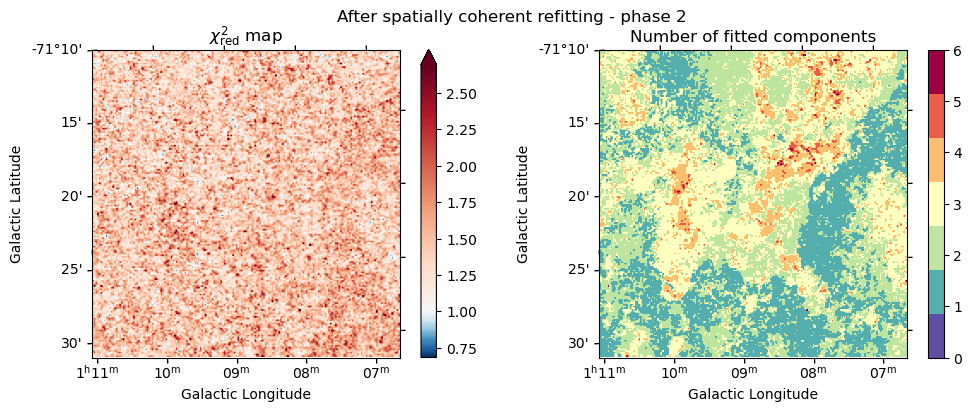

In [35]:
filepath = os.path.join(
    'decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_fit_fin_sf-p2_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
#vmax = 2.5
vmax = np.percentile(rchi2.flatten(), 99.8)

new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap, vmin=vmin, vmax=vmax)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_grs', 'gpy_maps', 'cloud_sub_cube_g+_fit_fin_sf-p2_component_map.fits'))

vmax = 6
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap, vmin=0, vmax=vmax)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After spatially coherent refitting - phase 2')

plt.show()

<a id="step7"></a>
#### 7. Finalize the decomposition results

Finally, we can produce a table containing the final fit results from the second phase of the spatially coherent refitting stage.

In [29]:
#  run the script
!python step_7-finalize--grs.py


check which spectra require refitting...

determine neighbors for all spectra...
32400it [00:12, 2540.31it/s]

start refit iteration #1...
Using 9 of 12 cpus
100%|█████████████████████████████████████| 32.4k/32.4k [00:19<00:00, 1.63kit/s]
32397it [00:00, 753289.43it/s]
SUCCESS
Using 9 of 12 cpus
100%|█████████████████████████████████████| 32.4k/32.4k [00:12<00:00, 2.61kit/s]
32397it [00:00, 776043.37it/s]
SAVED FILE: 'cloud_sub_cube_g+_fit_fin_sf-p2_finalized.dat' in 'decomposition_grs/gpy_decomposed'


**1.6** Based on the $\chi^2$ map, did the decomposition perform well? How many components did Gausspy find on average?

**1.7** Make histograms of the decomposition results for $v_{LSR}$ , FWHM (full width at half max), and amplitude. What can you conclude about the structure of the interstellar gas based on the histograms?

# What is $v_{LSR}$ ?

**Resource: Analyse_decomposition_results.ipynb**


In [23]:
# read the data file

data_dir = './decomposition_grs/gpy_decomposed/'
data_file = 'cloud_sub_cube_g+_fit_fin_sf-p2_finalized.dat'
data = ascii.read(os.path.join(data_dir + data_file))


In [24]:
data.keys()

['x_pos',
 'y_pos',
 'RA',
 'DEC',
 'amp',
 'e_amp',
 'VLSR',
 'e_VLSR',
 'vel_disp',
 'e_vel_disp',
 'int_tot',
 'e_int_tot',
 'rms',
 'pvalue',
 'aicc',
 'rchi2',
 'ncomps',
 'ncomp_wmedian',
 'ncomp_jumps',
 'flag_blended',
 'flag_neg_res_peak',
 'flag_broad',
 'flag_centroid']

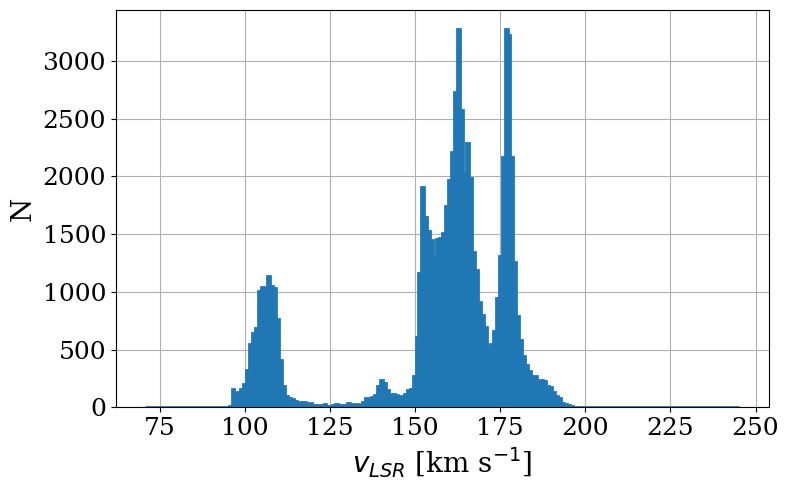

In [25]:
# plot velocity distributio of the components
# this indicates the emission at different velocities -> motion of the gas + different clouds in the line of sight

fig = plt.figure(figsize=(8.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
d = data['VLSR']
#bin_size = range(80,200, 2) 
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

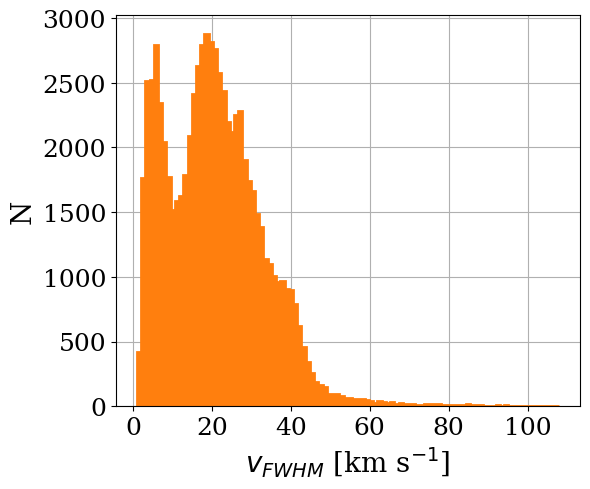

In [26]:
# FWH plots

fig = plt.figure(figsize=(6.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)

#convert sigma to FWHM:
d = abs(data['vel_disp'])*2.355

plt.hist(d, bins=100, histtype='step', color='C1', fill=True, linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{FWHM}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()


**1.8** Make a scatter plot of $v_{LSR}$ vs. FWHM. How many distinct features do you see? 

**Resource: Analyse_decomposition_results.ipynb**

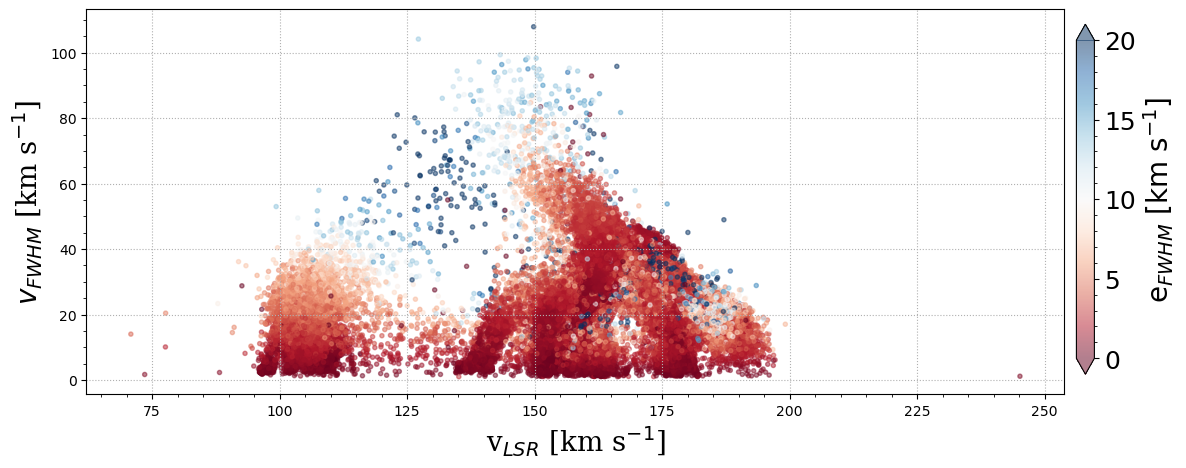

In [27]:
# velocity vs. FWHM

fig = plt.figure(figsize=(12.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])
#plt.title('SiO')

ax = fig.add_subplot(1,1,1)
cb = plt.scatter(data['VLSR'], abs(data['vel_disp']*2.355), marker='.', c=abs(data['e_vel_disp']*2.355), cmap='RdBu', alpha=0.5, vmax=20)
ax.set_xlabel('v$_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel(r'$v_{FWHM}$ [km s$^{-1}$]', size=20,family='serif')

#ax.set_xbound(25, 50)
#ax.set_ybound(0,100)

ax.minorticks_on()
plt.grid(True, linestyle=':')

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel('e$_{FWHM}$ [km s$^{-1}$]', fontsize=20)
plt.show()

**1.9** Make a map of the Gaussian components with $ 96 < v_{LSR} < 113$ km/s.

### Make maps of individual regions in the data cube based on the decomposition

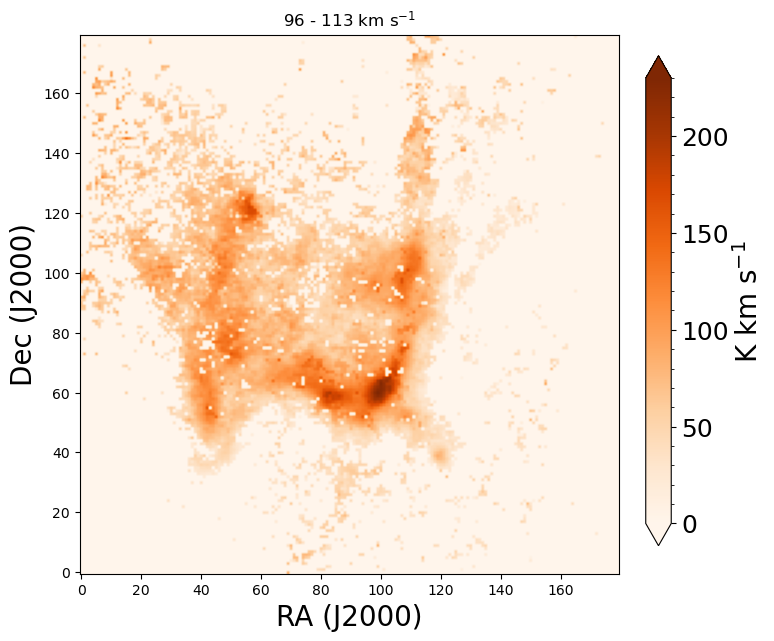

In [32]:
# divide the data into 2 sections:
data_2 = data[abs(data['VLSR'])>(96)] 
data_2 = data[abs(data['VLSR'])<(113)] 
#data_2 = data[abs(data['vel_disp']*2.355)<(4)] 

# exclude flagged pixels:
data_2 = data_2[abs(data_2['flag_neg_res_peak'])==0] 
data_2 = data_2[abs(data_2['ncomp_jumps'])==0] 
data_2 = data_2[abs(data_2['ncomp_jumps'])==0] 

# make the plot with the intensities
# first create the grid for the image
x = np.arange(np.max(data['x_pos'])+1)
y = np.arange(np.max(data['y_pos'])+1)
xx, yy = np.meshgrid(x, y, sparse=True)

z_2 = xx + yy
z_2 = z_2*0

for i in range(len(data_2)):
    k = data_2[i]['y_pos']
    l = data_2[i]['x_pos']
    z_2[k][l] = z_2[k][l] + abs(data_2[i]['int_tot'])

    
# plot the image
fig = plt.figure(figsize=(17.,7))

ax1 = fig.add_subplot(1,2,1)
plt.title(r'96 - 113 km s$^{-1}$')
cb= plt.imshow(z_2, cmap='Oranges')
ax1.set_xlabel("RA (J2000)", fontsize=20)
ax1.set_ylabel("Dec (J2000)", fontsize=20)
ax1.invert_yaxis()

#plt.colorbar() 
fig.subplots_adjust(right=2.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel('K km s$^{-1}$', fontsize=20)

fig.show()


## 2. (6 points) Comparing Dust maps to atomic hydrogen column density

The aim of this problem is to compare the interstellar dust extinction to the neutral hydrogen column density of the same region in the sky.

1. Make a map of dust extinction ($A_v$) using the dustmaps python package (https://dustmaps.readthedocs.io/en/latest/) for the following region: R.A: 73.0$^{\circ}$ Dec: 3.0$^{\circ}$. Select the region so that it has a width of 10$^{\circ}$ x 10$^{\circ}$. Use data from the "Bayestar" dust map (Green et al. 2019 https://doi.org/10.3847/1538-4357/ab5362). 
2. Get the neutral atomic hydrogen column density N(HI) map for the same region of the sky. For this you can use the astroquery python package and select the 'HI4PI' survey. Make sure to select the same region with the same pixel size. 
3. Make an overlay of the two data sets. Plot N(HI) as the contours. 
4. Make histograms of $A_v$ and N(HI). Compare the two distributions. What do you notice about the two distributions?
5. Make a plot of $A_v$ vs. N(HI). Fit a linear relation to the data. How does the fit compare to the relation found in Güver and Özel 2009 (https://doi.org/10.1111/j.1365-2966.2009.15598.x): N(HI) = $A_v \times 2.2 \times 10^{21}$?
6. What do you think is the reason for the differences between your fit and the results of Güver and Özel 2009?

**2.1** Make a map of dust extinction ($A_v$) using the dustmaps python package (https://dustmaps.readthedocs.io/en/latest/) for the following region: R.A: 73.0$^{\circ}$ Dec: 3.0$^{\circ}$. Select the region so that it has a width of 10$^{\circ}$ x 10$^{\circ}$. Use data from the "Bayestar" dust map (Green et al. 2019 https://doi.org/10.3847/1538-4357/ab5362). 

# Question: what part would you change so that the region has a width of 10 x 10? 

In [33]:
import astropy.units as units
from dustmaps.bayestar import BayestarQuery

from dustmaps.sfd import SFDWebQuery
from dustmaps.bayestar import BayestarWebQuery

from astroquery.skyview import SkyView


In [34]:
from __future__ import print_function

from dustmaps.sfd import SFDQuery
from dustmaps.planck import PlanckQuery
from dustmaps.bayestar import BayestarQuery

In [35]:
ra0, dec0 = (73., 3.)
ra = np.arange(ra0 - 4., ra0 + 4., 0.05)
#ra = np.arange(ra0 - 10., ra0 + 10., 0.05)

dec = np.arange(dec0 - 4., dec0 + 4., 0.05)
#dec = np.arange(dec0 - 10., dec0 + 10., 0.05)

ra, dec = np.meshgrid(ra, dec)
coords = SkyCoord(ra*units.deg, dec*units.deg,
                  distance=1.*units.kpc, frame='icrs')

### Doing a Web based Query

In [36]:
bayestar = BayestarWebQuery()
# convert E(B-V) to A_v
Av_bayestar = 2.742 * bayestar(coords)


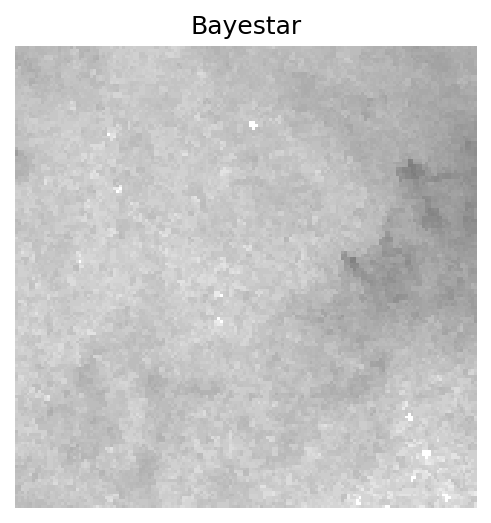

In [37]:
fig = plt.figure(figsize=(12,4), dpi=150)

for k,(Av,title) in enumerate([(Av_bayestar, 'Bayestar')]):
    
    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=2.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('comparison.png', dpi=150)

In [38]:
Av_bayestar.shape

(160, 160)

**2.2** Get the neutral atomic hydrogen column density N(HI) map for the same region of the sky. For this you can use the astroquery python package and select the 'HI4PI' survey. Make sure to select the same region with the same pixel size. 

In [39]:
c = SkyCoord(ra=ra0*u.degree, dec=dec0*u.degree, frame='icrs')
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (73., 3.)>

In [40]:
# get HI column denisty map for the same region of the sky
path = SkyView.get_images(position=c.icrs, width=10*u.deg, height=10*u.deg, survey=['HI4PI'], pixels=[160,160])

hdulist_HI = path[0]
d_HI = hdulist_HI[0].data
h_HI = hdulist_HI[0].header

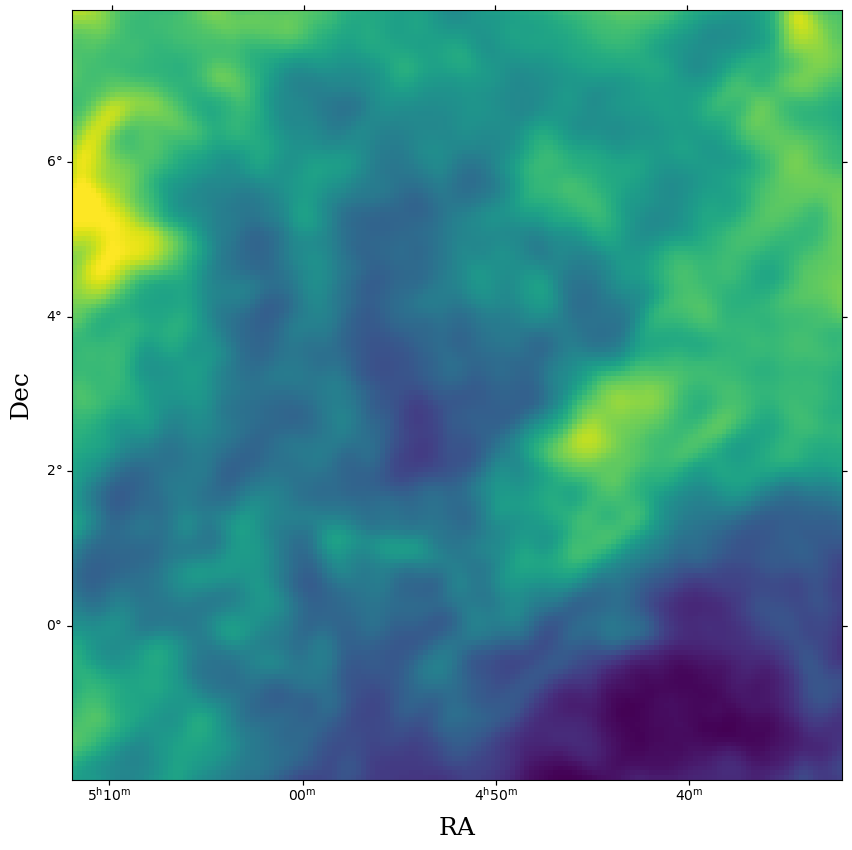

In [41]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_HI))
ax.imshow(d_HI, vmax=np.percentile(d_HI, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

**2.3** Make an overlay of the two data sets. Plot N(HI) as the contours.

### Compare the dust and the gas data

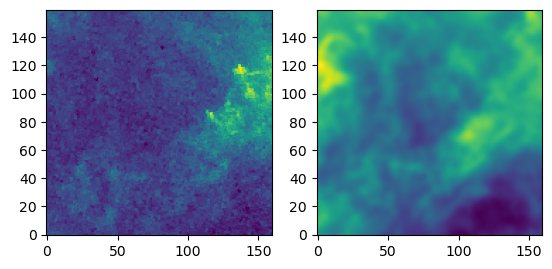

In [42]:
# lets make the two images match. We need to reverse the RA direction for the dust map

Av2 = Av_bayestar[:, ::-1]

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.imshow(Av2)
ax1.invert_yaxis()

ax2 = fig.add_subplot(1,2,2)
plt.imshow(d_HI)
ax2.invert_yaxis()

plt.show()

### Lets make an overlay of the dust map with N(HI) contours

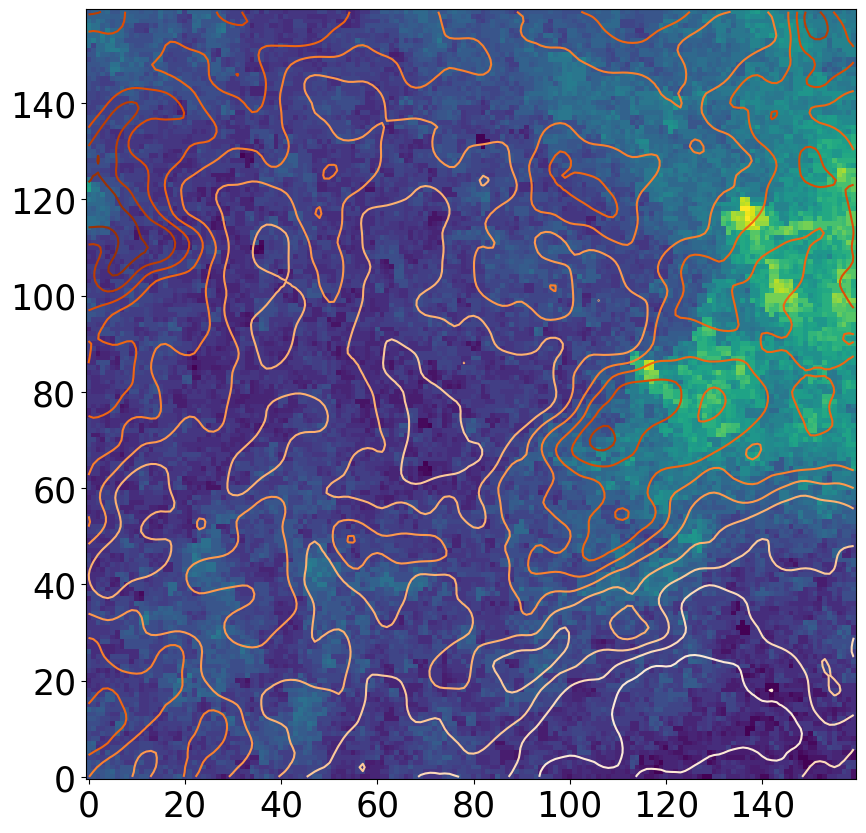

In [43]:
# making an overlay

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(Av2)
ax.contour(d_HI, levels=10, cmap='Oranges')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.invert_yaxis()
plt.show()

**2.4** Make histograms of $A_v$ and N(HI). Compare the two distributions. What do you notice about the two distributions?

In [45]:
print(Av2.shape)

(160, 160)


In [46]:
print(d_HI.shape)

(160, 160)


In [47]:
print(data['VLSR'].shape)

(74243,)


In [51]:
#Reshape N(HI) to make the histogram

d_HI_histo = d_HI.reshape((25600, ))

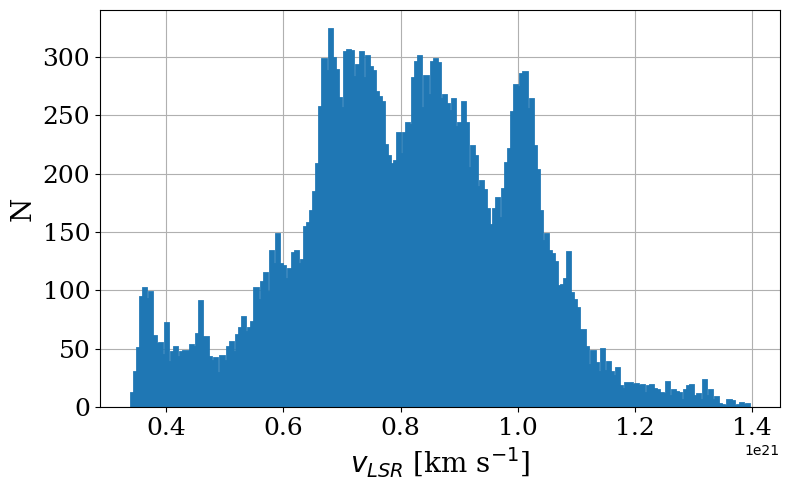

In [52]:
# plot velocity distributio of the components
# this indicates the emission at different velocities -> motion of the gas + different clouds in the line of sight

fig = plt.figure(figsize=(8.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
#d = data['VLSR']
#bin_size = range(80,200, 2) 
#plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.hist(d_HI_histo, bins=200, histtype='step', color='C0', fill=True, linewidth=2)

plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
#Reshape Av to make the histogram

d_Av_histo = Av2.reshape((25600, ))

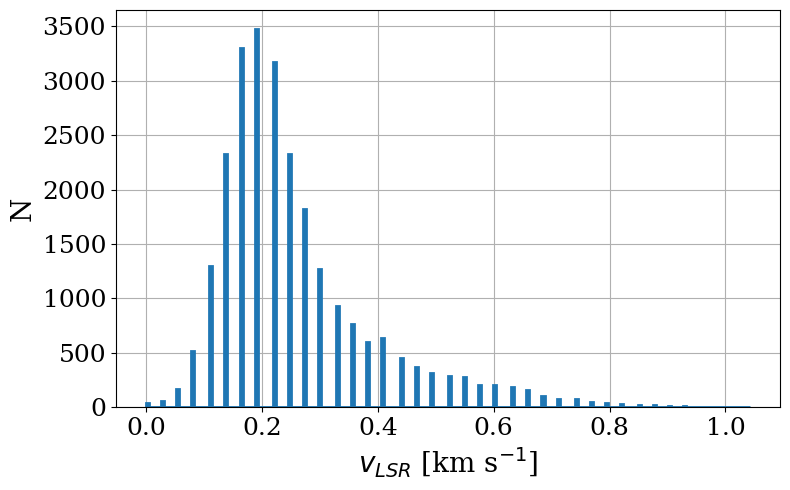

In [54]:
# plot velocity distributio of the components
# this indicates the emission at different velocities -> motion of the gas + different clouds in the line of sight

fig = plt.figure(figsize=(8.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
#d = data['VLSR']
#bin_size = range(80,200, 2) 
#plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.hist(d_Av_histo, bins=200, histtype='step', color='C0', fill=True, linewidth=2)

plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

**2.5** Make a plot of $A_v$ vs. N(HI). Fit a linear relation to the data. How does the fit compare to the relation found in Güver and Özel 2009 (https://doi.org/10.1111/j.1365-2966.2009.15598.x): N(HI) = $A_v \times 2.2 \times 10^{21}$?

#### Comparing the E(B-V) to the N(HI) data

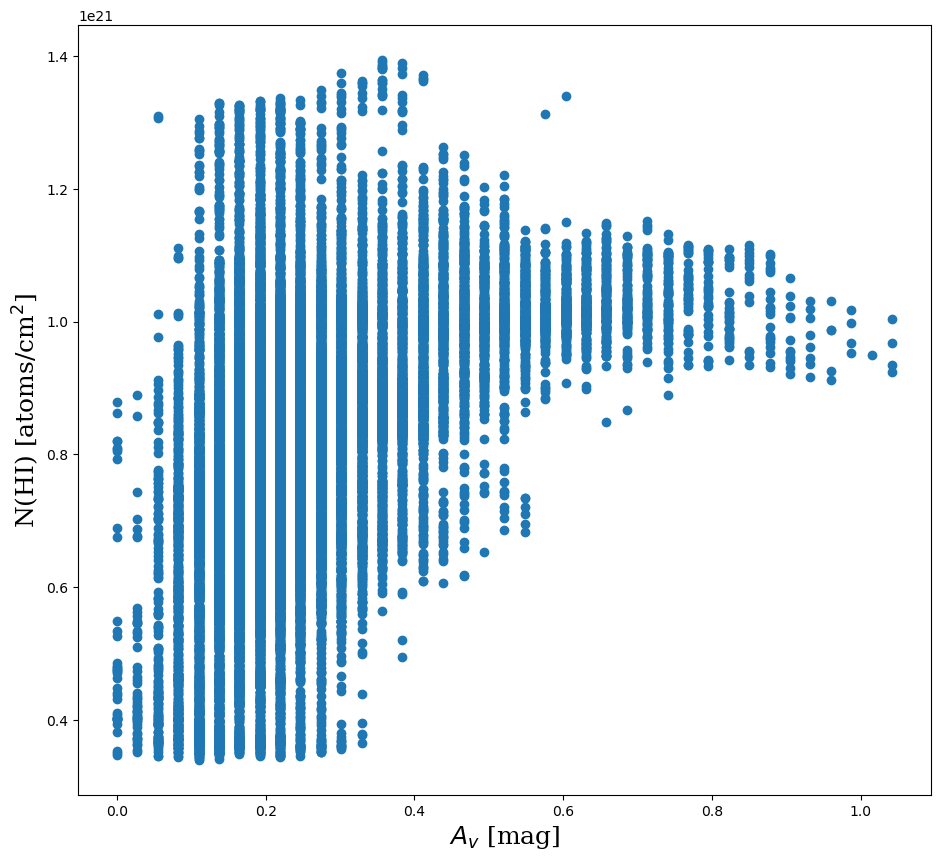

In [48]:
# compare E(B-V) to N(HI)

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(Av2, d_HI)
ax.set_xlabel(r'$A_{v}$ [mag]', size=18,family='serif')
ax.set_ylabel(r'N(HI) [atoms/cm$^2$]', size=18,family='serif')
plt.show()

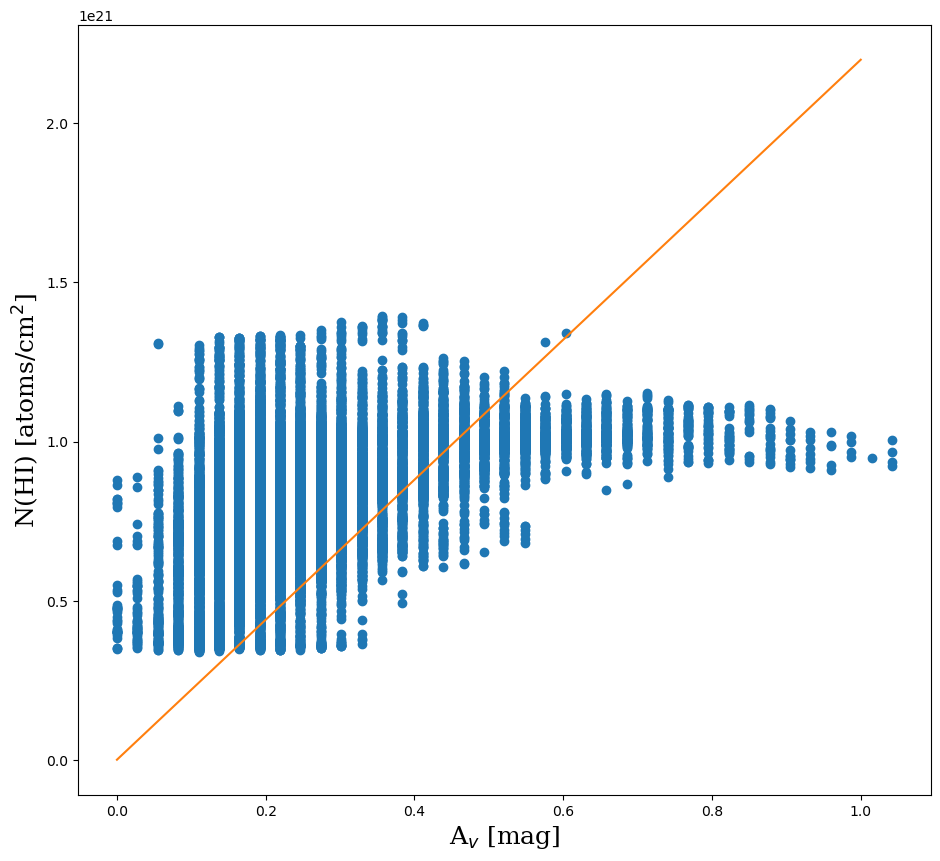

In [49]:
# lets add a model from a scientic paper
# relation from Güver and Özel 2009 (doi:10.1111/j.1365-2966.2009.15598.x)

ebv_range = np.arange(np.min(Av), np.max(Av), 0.1)
line = ebv_range * 2.2 * 10**21

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(Av2, d_HI)
plt.plot(ebv_range, line, color='C1')
ax.set_xlabel(r'A$_{v}$ [mag]', size=18,family='serif')
ax.set_ylabel(r'N(HI) [atoms/cm$^2$]', size=18,family='serif')
plt.show()

**2.6** What do you think is the reason for the differences between your fit and the results of Güver and Özel 2009?